# Data Science Final Project

### Hypotheses : The Pole Position has not the same Importance in every circuit.

### Causation: In this case, if there is a change on the grid position, then thfinal result of the race is affected by that

In [ ]:
# Libraries
import pandas as pd
from cmath import nan
import pickle
from matplotlib import pyplot as plt
import numpy as np
import string
from IPython.display import Image
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [2]:
#Id for the races we want to work with
catalunyaid = 4
monacoid = 6
montrealid = 7
silverstoneid = 9
hungaroringid = 11
spaid = 13
monzaid = 14
singaporeid = 15
sochiid = 71

In [3]:
# Now, lets import the datasets
races = pd.read_csv('races.csv')
#races = races['raceId', 'year', 'circuitId']
results = pd.read_csv('results.csv')
#results = results['raceId', 'grid', 'position']

In [4]:
list= range(1,30)
def plot_circuit(result, name):
    #Plot results
    n = len(result)
    x =[]
    for i in range(n):
        x.append(i)
    plt.plot(x, result, 'bo',x, result, 'p--')
    plt.title(name + ' Results')
    plt.xlabel("Races")
    plt.ylabel("Position of #1 grid")
    plt.gca().invert_yaxis()
    plt.show()

In [5]:
def regression_fun(result):
    x = np.array(range(len(result))).reshape(-1, 1)
    model = LinearRegression()
    X_train, X_test, t_train, t_test = train_test_split(x, result, test_size=0.01)
    model.fit(X_train, t_train)
    arr = model.predict(X_test)
    print('Prediction made with Linear regression:',round(arr[0]))
    #acc = accuracy_score(t_test,arr[0] )
    #print('Accuracy: %.3f' % acc)

In [6]:
def regression_fun2(result):
    #Add Noise to data
    '''for i in range(2):
        for i in result:
            result.append(i)
    for i in range(56):
        result.append(1)
    for i in range(13):
        result.append(2)
    for i in range(10):
        result.append(3)
    for i in range(3):
        result.append(5)
    result.append(4)
    result.append(6)
    result.append(7)
    result.append(9)
    result.append(12)
    result.append(8)
    result.append(10)'''
    answer = []
    x = np.array(range(len(result))).reshape(-1, 1)
    X_train, X_test, t_train, t_test = train_test_split(x, result, test_size=0.01)
    model = DecisionTreeRegressor().fit(X_train,t_train)
    predict=model.predict(X_test)
    print('Prediction made with Decision Tree:', round(predict[0]))
    for i in range(len(result)):
        X_train, X_test, t_train, t_test = train_test_split(x, result, test_size=0.01)
        model = DecisionTreeRegressor().fit(X_train,t_train)
        arr=model.predict(X_test)
        clf = tree.DecisionTreeClassifier()
        clf = clf.fit(X_train,t_train)
        tree.plot_tree(clf)
        answer.append(arr[0])
    return answer

In [7]:
def gaussian_fun(result):
    x = np.array(range(len(result))).reshape(-1, 1)
    model = MultinomialNB()
    model.fit(x, result)
    arr = model.predict_proba([[len(result)+1]])
    answer = np.zeros(20,)
    positions = model.classes_
    positions = positions.astype(int)
    count = 0
    for i in positions:
        
        num  = i - 1
        answer[num] = arr[0][count]
        count += 1
        
    return answer

In [8]:
def plot_pos(my_model):
    x = [1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
    plt.xticks(x)
    plt.bar(x, my_model) # A bar chart
    plt.xlabel('Bins')
    plt.ylabel('Frequency')

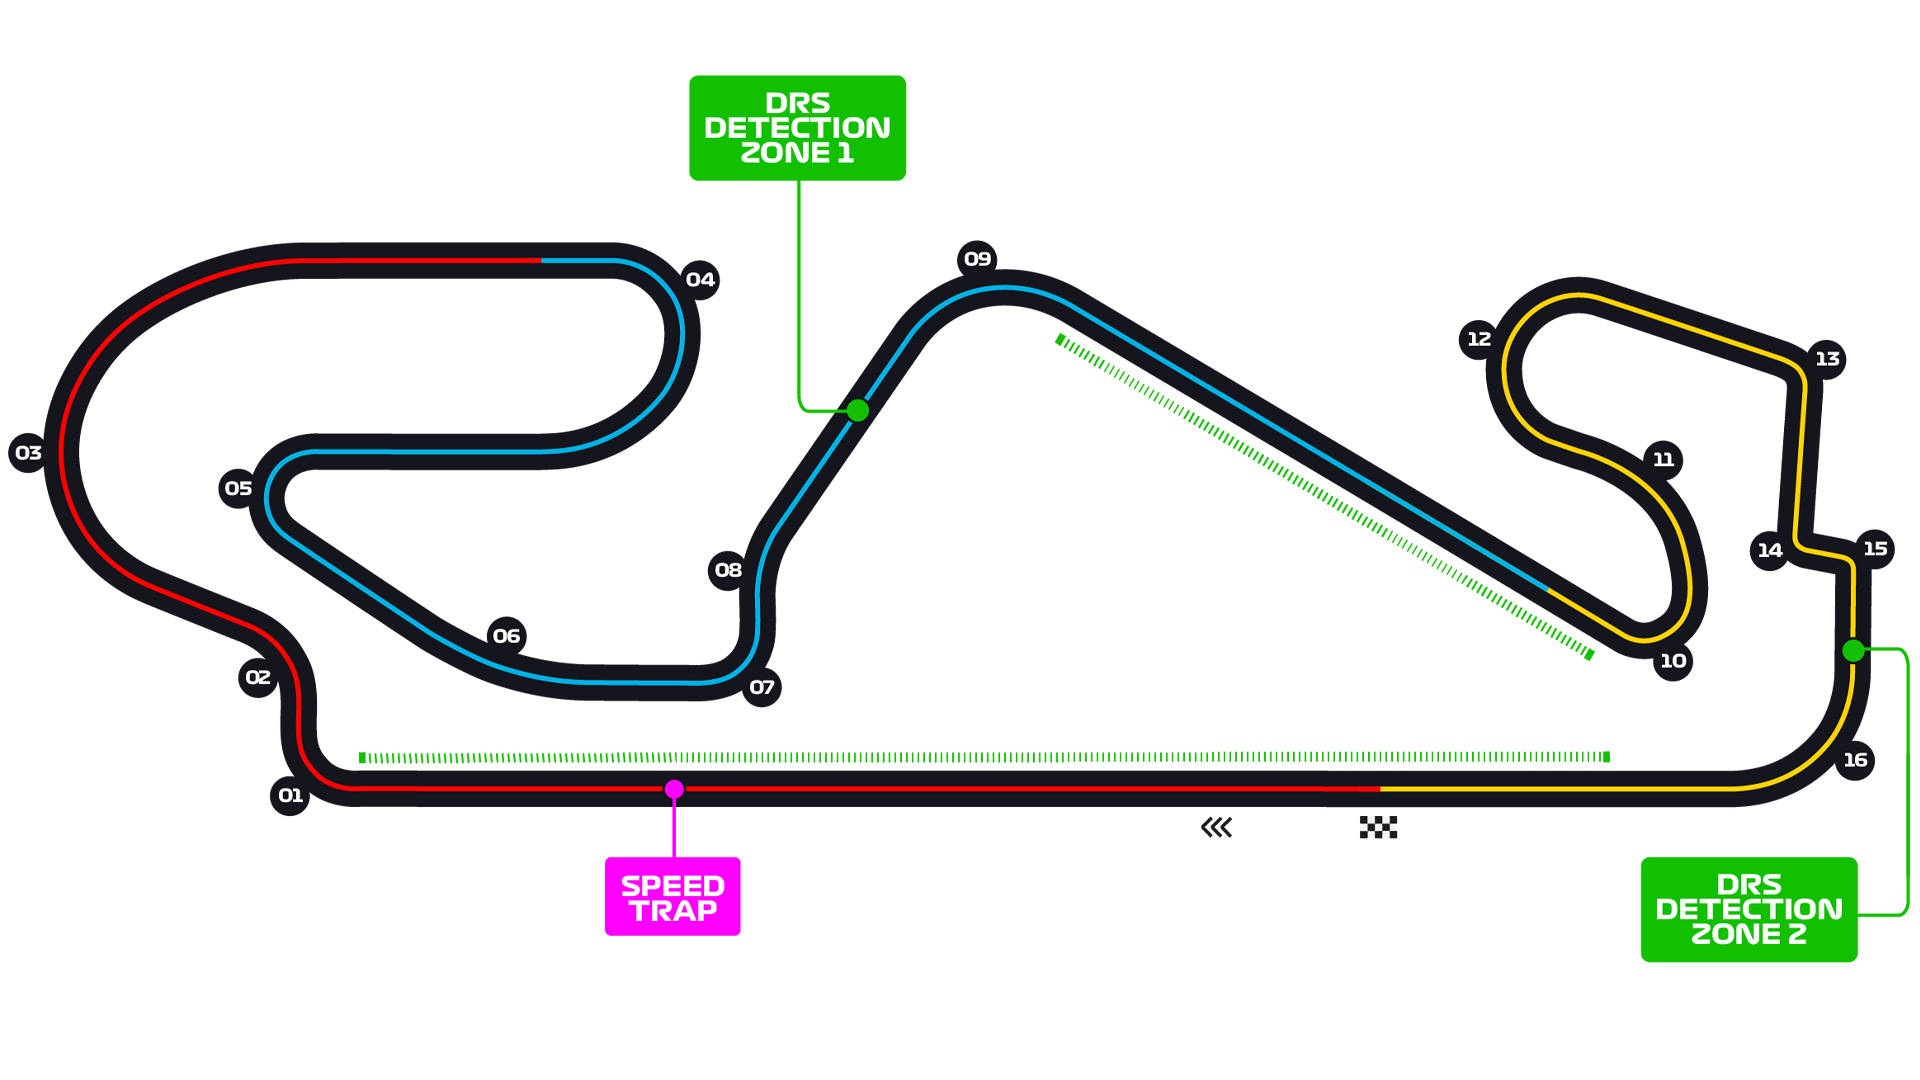

In [9]:
#Catalunya
catalunya = []
catalunya_results = []
catalunya_count = 0
Image('Spain_Circuit.png')

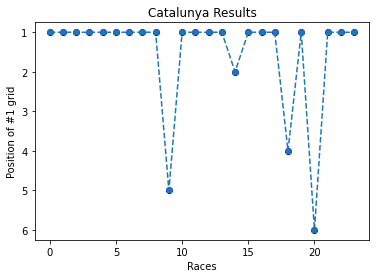

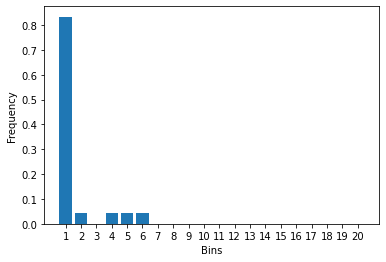

In [10]:

#Catalunya
catalunya = []
catalunya_results = []
catalunya_count = 0
catalunyaDF = races.loc[races['circuitId'] == catalunyaid]['raceId']
for x in catalunyaDF:
    catalunya.append(x)
    test = results.loc[(results['grid'] == 1) & (results['raceId'] == x)]['position']
    for i in test:
        if i in list :
            catalunya_results.append(i)
        else:
            catalunya_count += 1
    
#Plot results
plot_circuit(catalunya_results, "Catalunya")
# Regression time

gaus = gaussian_fun(catalunya_results)
plot_pos(gaus)



Prediction made with Linear regression: 1
Prediction made with Decision Tree: 1


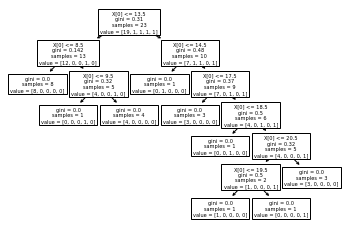

In [11]:
regression_fun(catalunya_results)
pred_Cat = regression_fun2(catalunya_results)


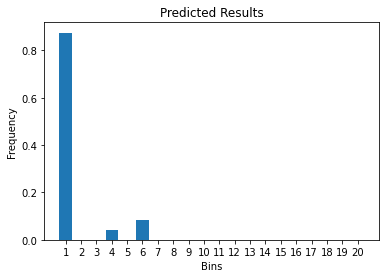

In [12]:
gaus = gaussian_fun(pred_Cat)
plt.title('Predicted Results')
plot_pos(gaus)

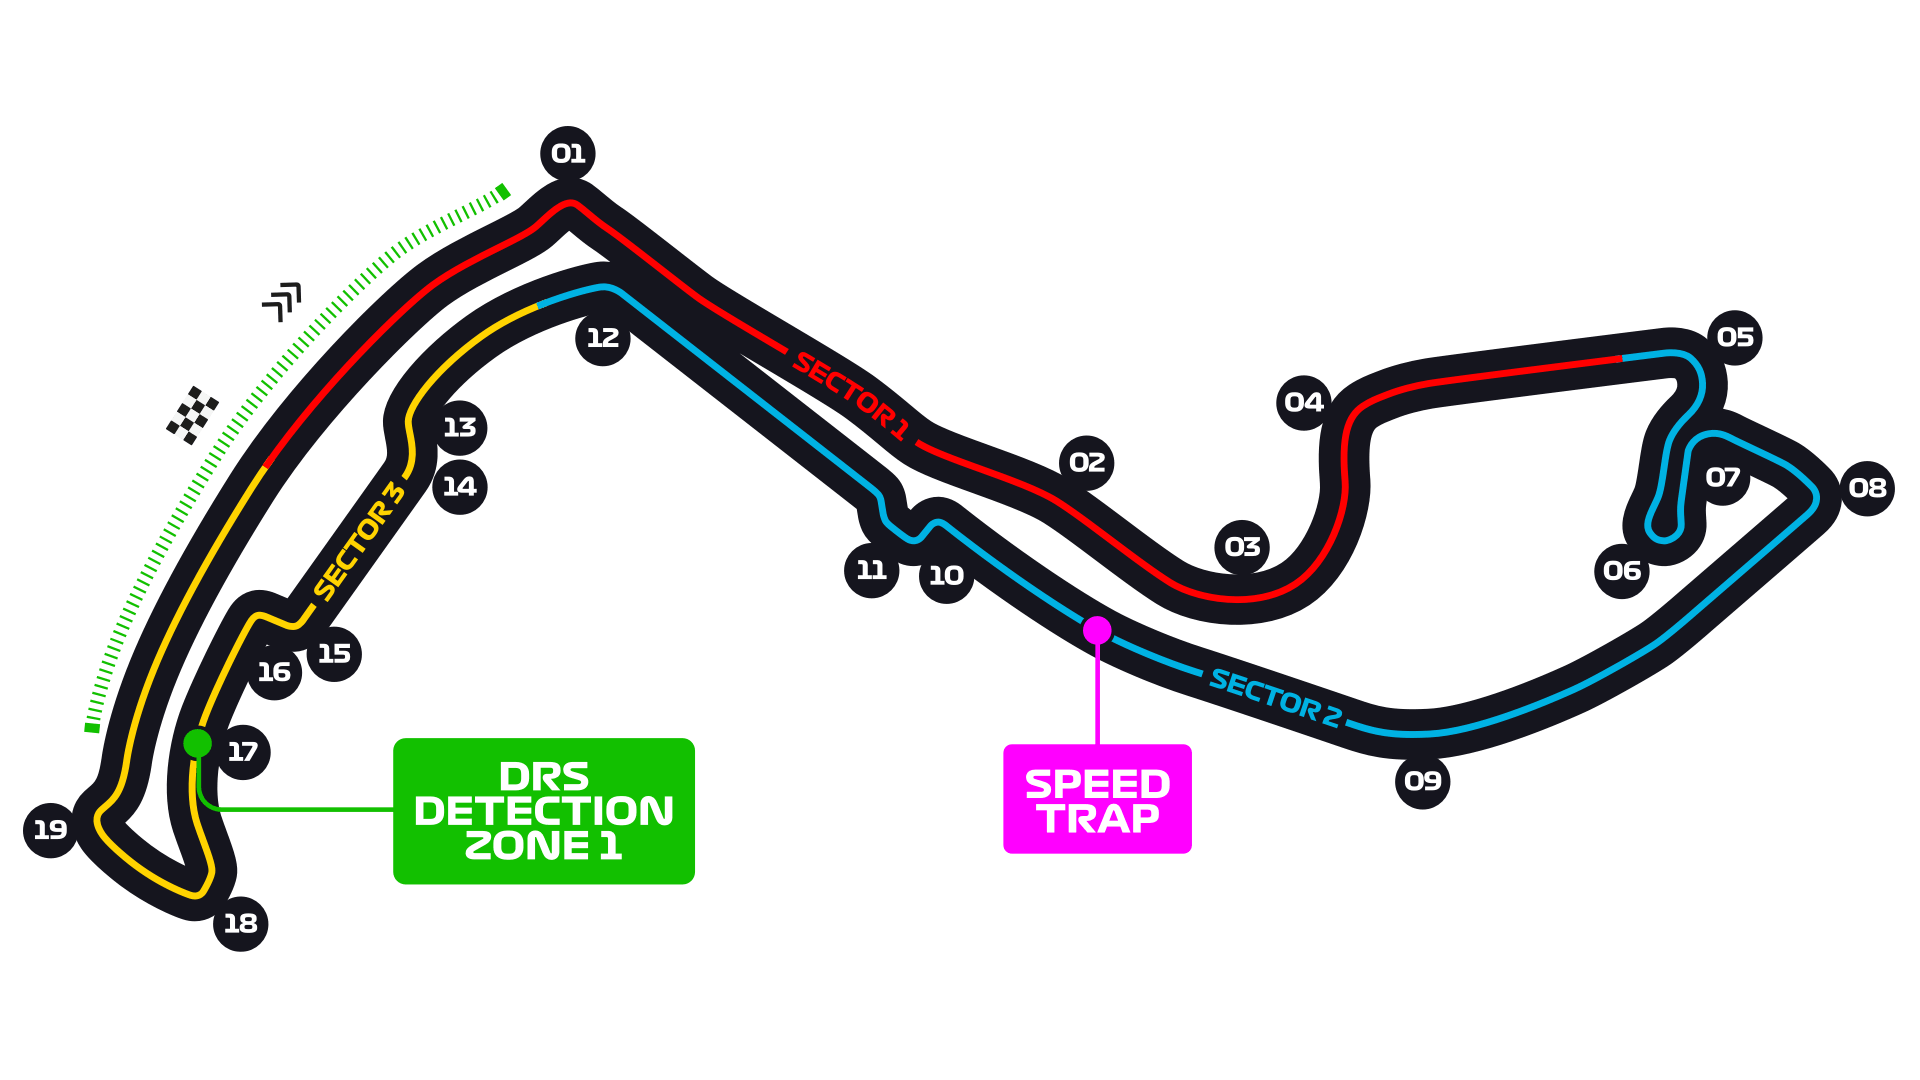

In [13]:
#Monaco
monaco = []
monaco_results = []
monaco_count = 0
Image('Monoco_Circuit.png')

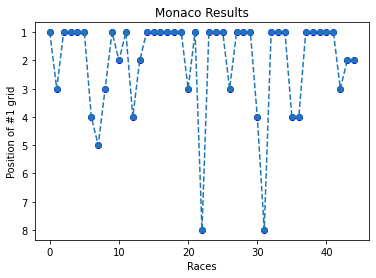

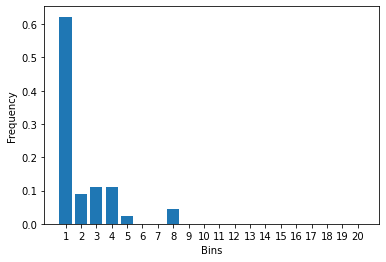

In [14]:


monacoDF = races.loc[races['circuitId'] == monacoid]['raceId']
for x in monacoDF:
    monaco.append(x)
    test = results.loc[(results['grid'] == 1) & (results['raceId'] == x)]['position']
    for i in test:
        if i in list:
            monaco_results.append(i)
        else:
            monaco_count += 1
#Plot results 
plot_circuit(monaco_results, "Monaco")


gaus = gaussian_fun(monaco_results)
plot_pos(gaus)

Prediction made with Linear regression: 2
Prediction made with Decision Tree: 4


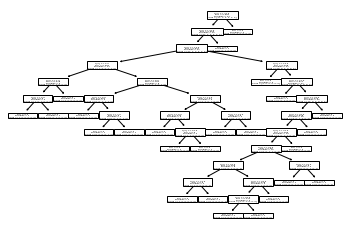

In [15]:
regression_fun(monaco_results)
pred = regression_fun2(monaco_results)

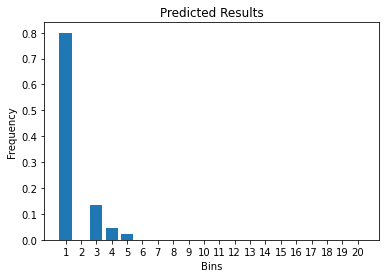

In [16]:
gaus = gaussian_fun(pred)
plt.title('Predicted Results')
plot_pos(gaus)

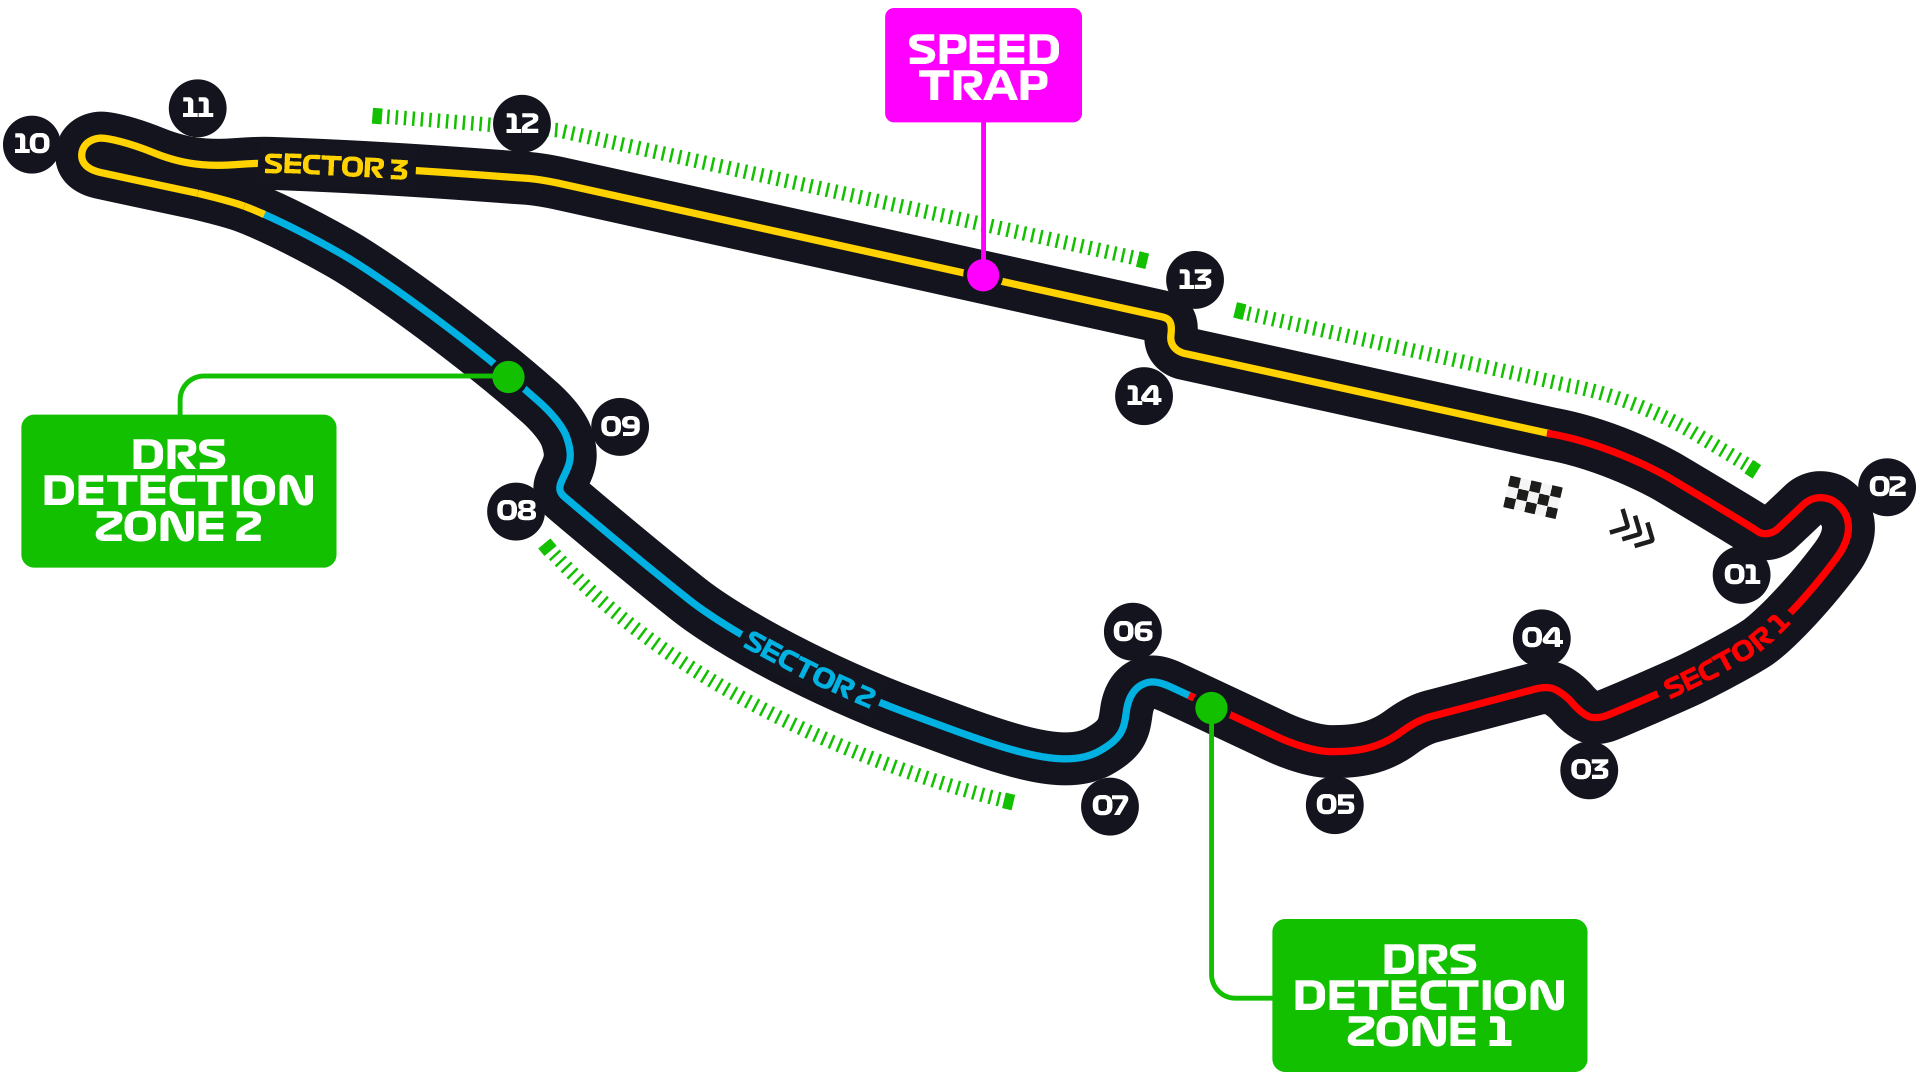

In [17]:
#Montreal
montreal = []
montreal_results = []
montreal_count = 0
Image('Canada_Circuit.png')

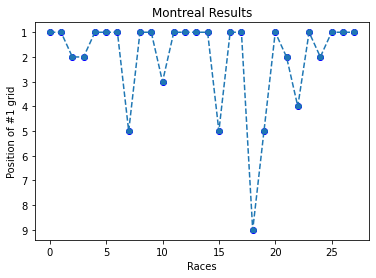

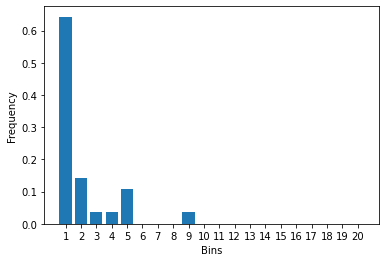

In [18]:
montrealDF = races.loc[races['circuitId'] == montrealid]['raceId']
for x in montrealDF:
    montreal.append(x)
    test = results.loc[(results['grid'] == 1) & (results['raceId'] == x)]['position']
    for i in test:
        if i in list:
            montreal_results.append(i)
        else:
            montreal_count += 1
    
#Plot results
plot_circuit(montreal_results, "Montreal")

# Regression time

gaus = gaussian_fun(montreal_results)
plot_pos(gaus)

Prediction made with Linear regression: 2
Prediction made with Decision Tree: 1


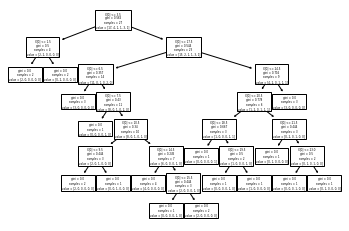

In [19]:
regression_fun(montreal_results)
pred = regression_fun2(montreal_results)

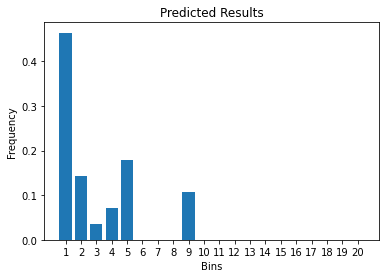

In [20]:
gaus = gaussian_fun(pred)
plt.title('Predicted Results')
plot_pos(gaus)

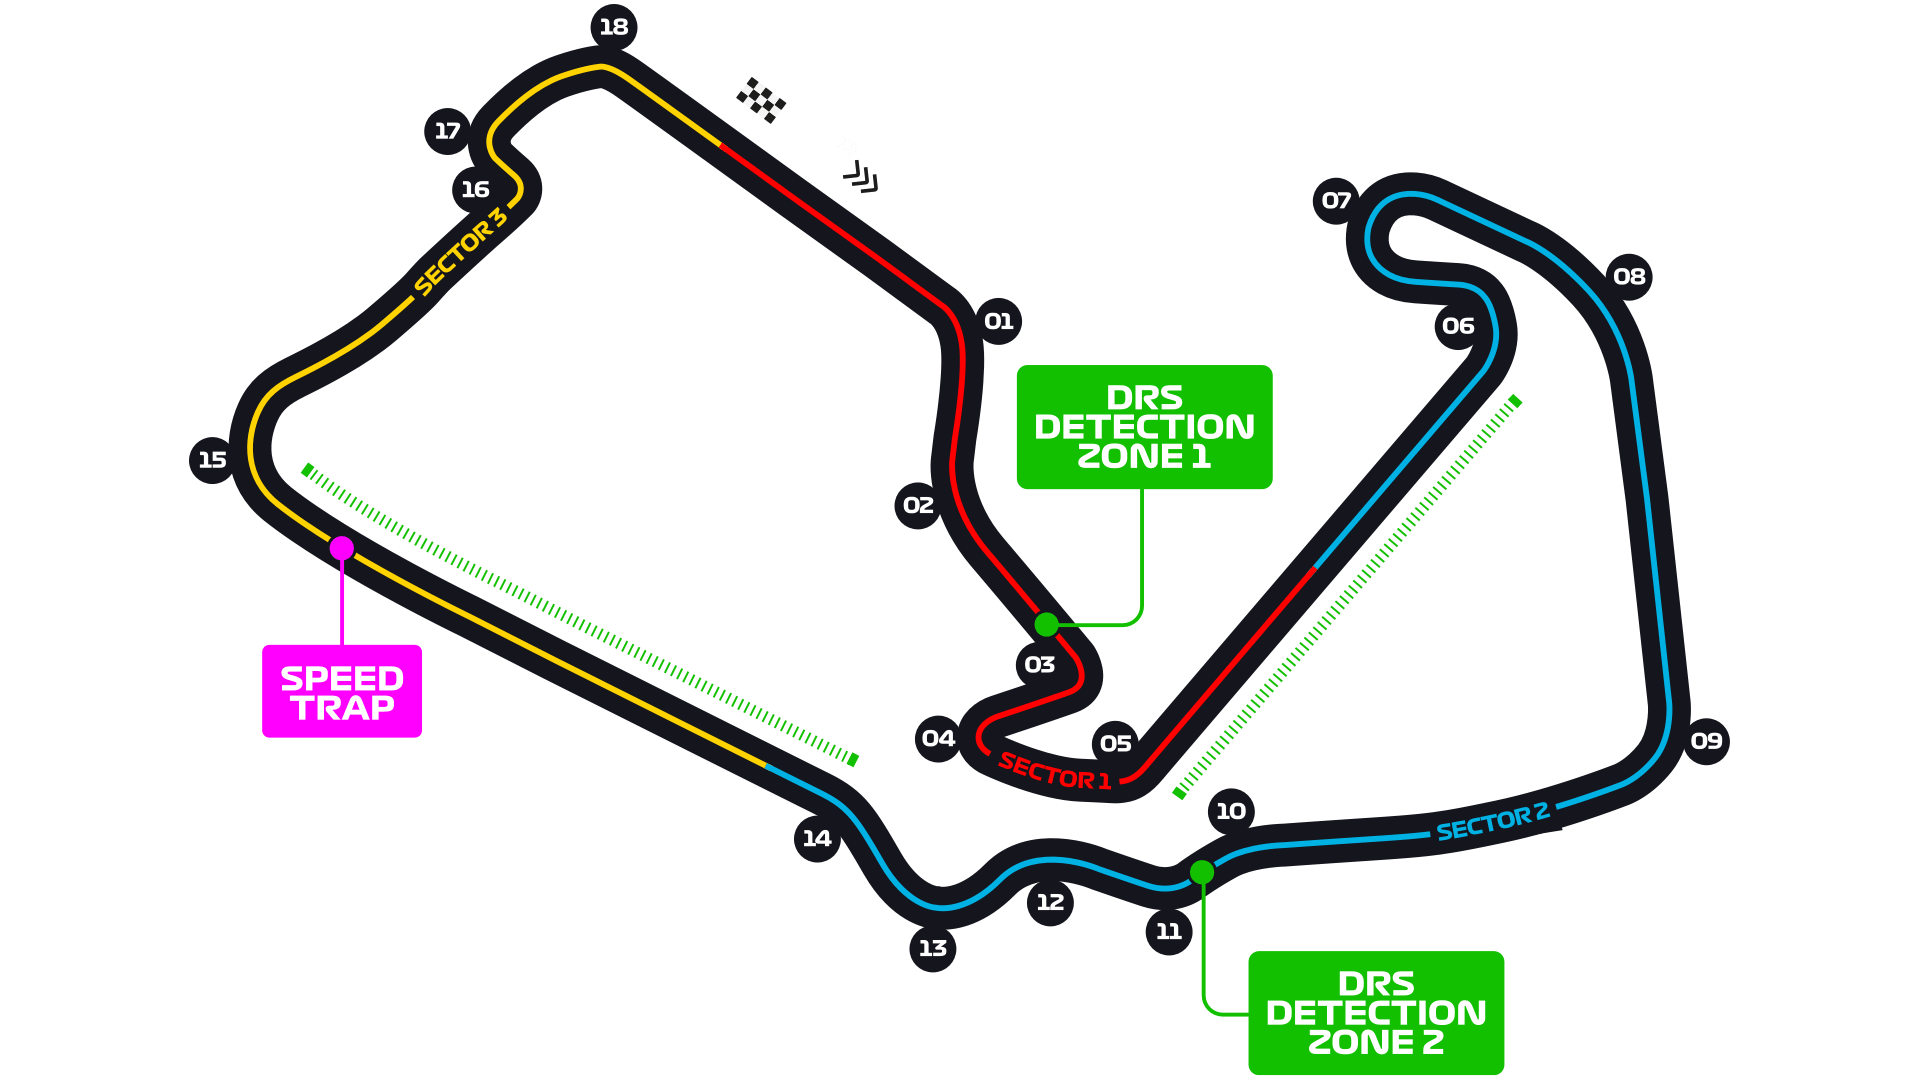

In [21]:
#Silverstone
silverstone = []
silverstone_results = []
silverstone_count = 0
Image('Great_Britain_Circuit.png')

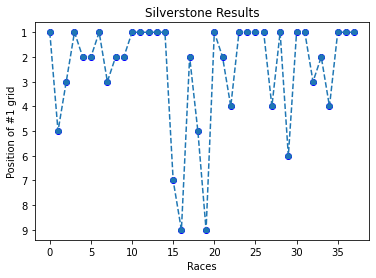

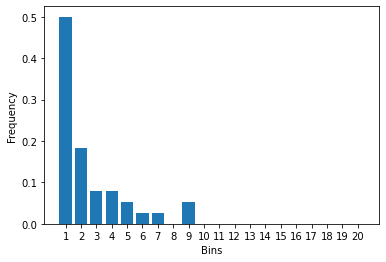

In [22]:
silverstoneDF = races.loc[races['circuitId'] == silverstoneid]['raceId']
for x in silverstoneDF:
    silverstone.append(x)
    test = results.loc[(results['grid'] == 1) & (results['raceId'] == x)]['position']
    for i in test:
        if i in list:
            silverstone_results.append(i)
        else:
            silverstone_count += 1
#Plot results
plot_circuit(silverstone_results, "Silverstone")
# Regression time
gaus = gaussian_fun(silverstone_results)
plot_pos(gaus)

Prediction made with Linear regression: 2
Prediction made with Decision Tree: 2


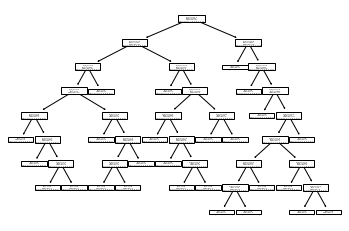

In [23]:
regression_fun(silverstone_results)
pred = regression_fun2(silverstone_results)

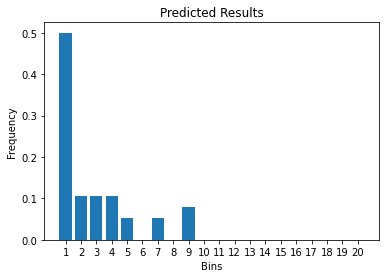

In [24]:
gaus = gaussian_fun(pred)
plt.title('Predicted Results')
plot_pos(gaus)

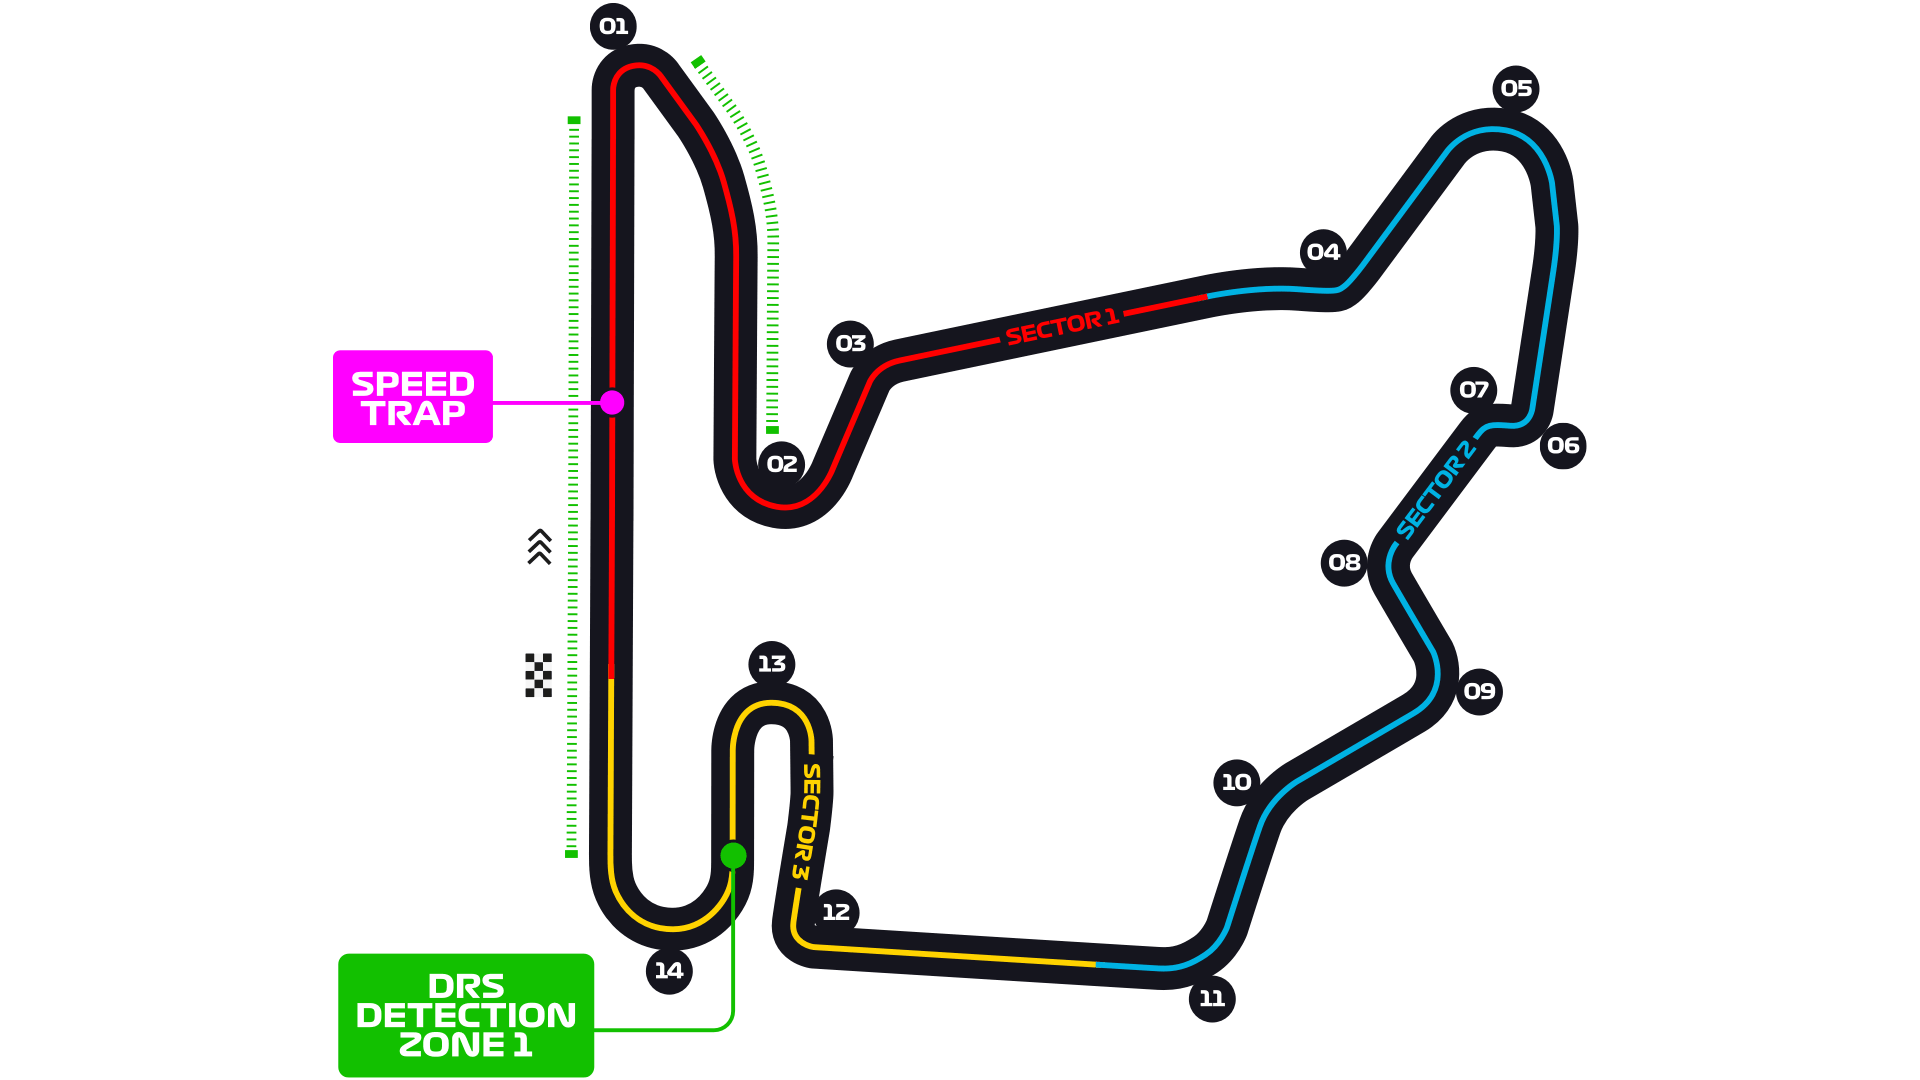

In [25]:
#Hungaroing
hungaroring = []
hungaroring_results = []
hungaroring_count = 0
Image('Hungary_Circuit.png')

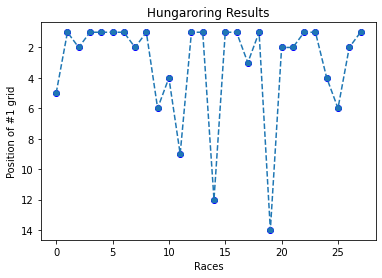

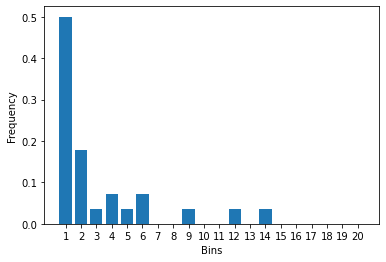

In [26]:
hungaroringDF = races.loc[races['circuitId'] == hungaroringid]['raceId']
for x in hungaroringDF:
    hungaroring.append(x)
    test = results.loc[(results['grid'] == 1) & (results['raceId'] == x)]['position']
    for i in test:
        if i in list:
            hungaroring_results.append(i)
        else:
            hungaroring_count += 1
    
#Plot results
plot_circuit(hungaroring_results, "Hungaroring")
# Regression time

gaus = gaussian_fun(hungaroring_results)
plot_pos(gaus)

Prediction made with Linear regression: 3
Prediction made with Decision Tree: 1


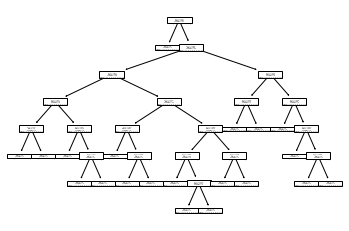

In [27]:
regression_fun(hungaroring_results)
pred = regression_fun2(hungaroring_results)

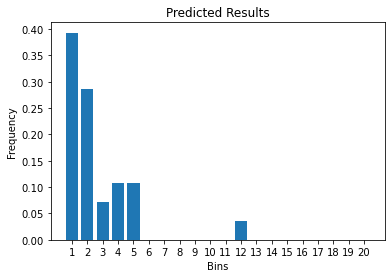

In [28]:
gaus = gaussian_fun(pred)
plt.title('Predicted Results')
plot_pos(gaus)

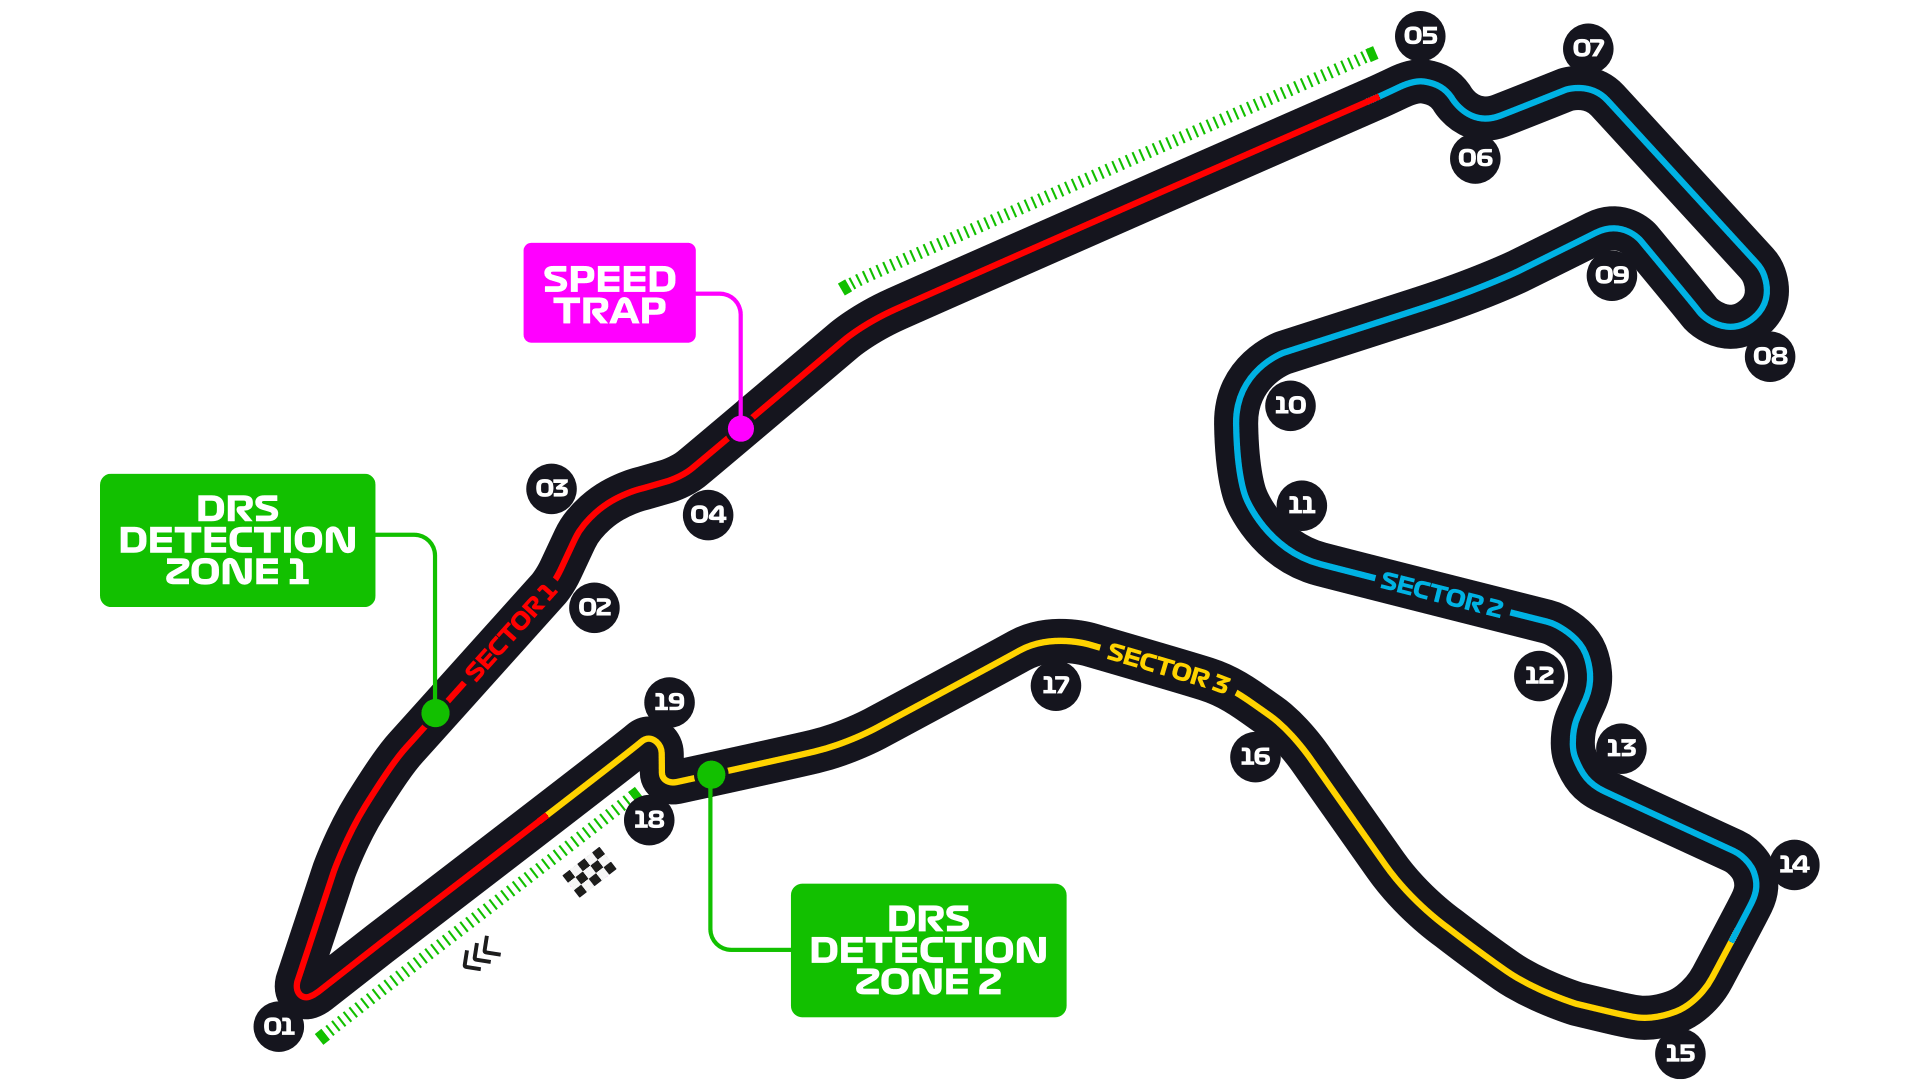

In [29]:
#Spa
spa = []
spa_results = []
spa_count = 0
Image('Belgium_Circuit.png')

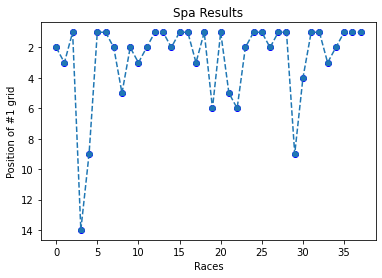

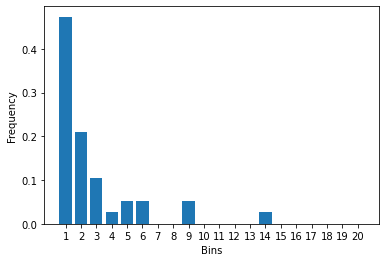

In [30]:
spaDF = races.loc[races['circuitId'] == spaid]['raceId']
for x in spaDF:
    spa.append(x)
    test = results.loc[(results['grid'] == 1) & (results['raceId'] == x)]['position']
    for i in test:
        if i in list:
            spa_results.append(i)
        else:
            spa_count += 1
    
#Plot results
plot_circuit(spa_results, "Spa")

# Regression time

gaus = gaussian_fun(spa_results)
plot_pos(gaus)

Prediction made with Linear regression: 2
Prediction made with Decision Tree: 1


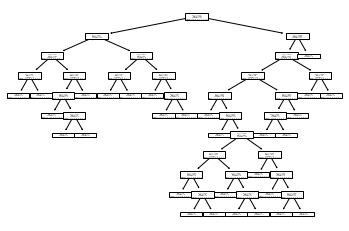

In [31]:
regression_fun(spa_results)
pred = regression_fun2(spa_results)

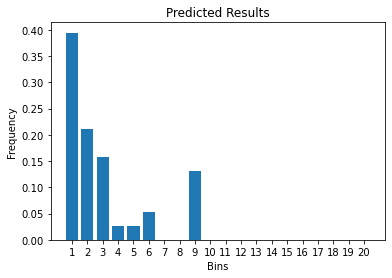

In [32]:
gaus = gaussian_fun(pred)
plt.title('Predicted Results')
plot_pos(gaus)

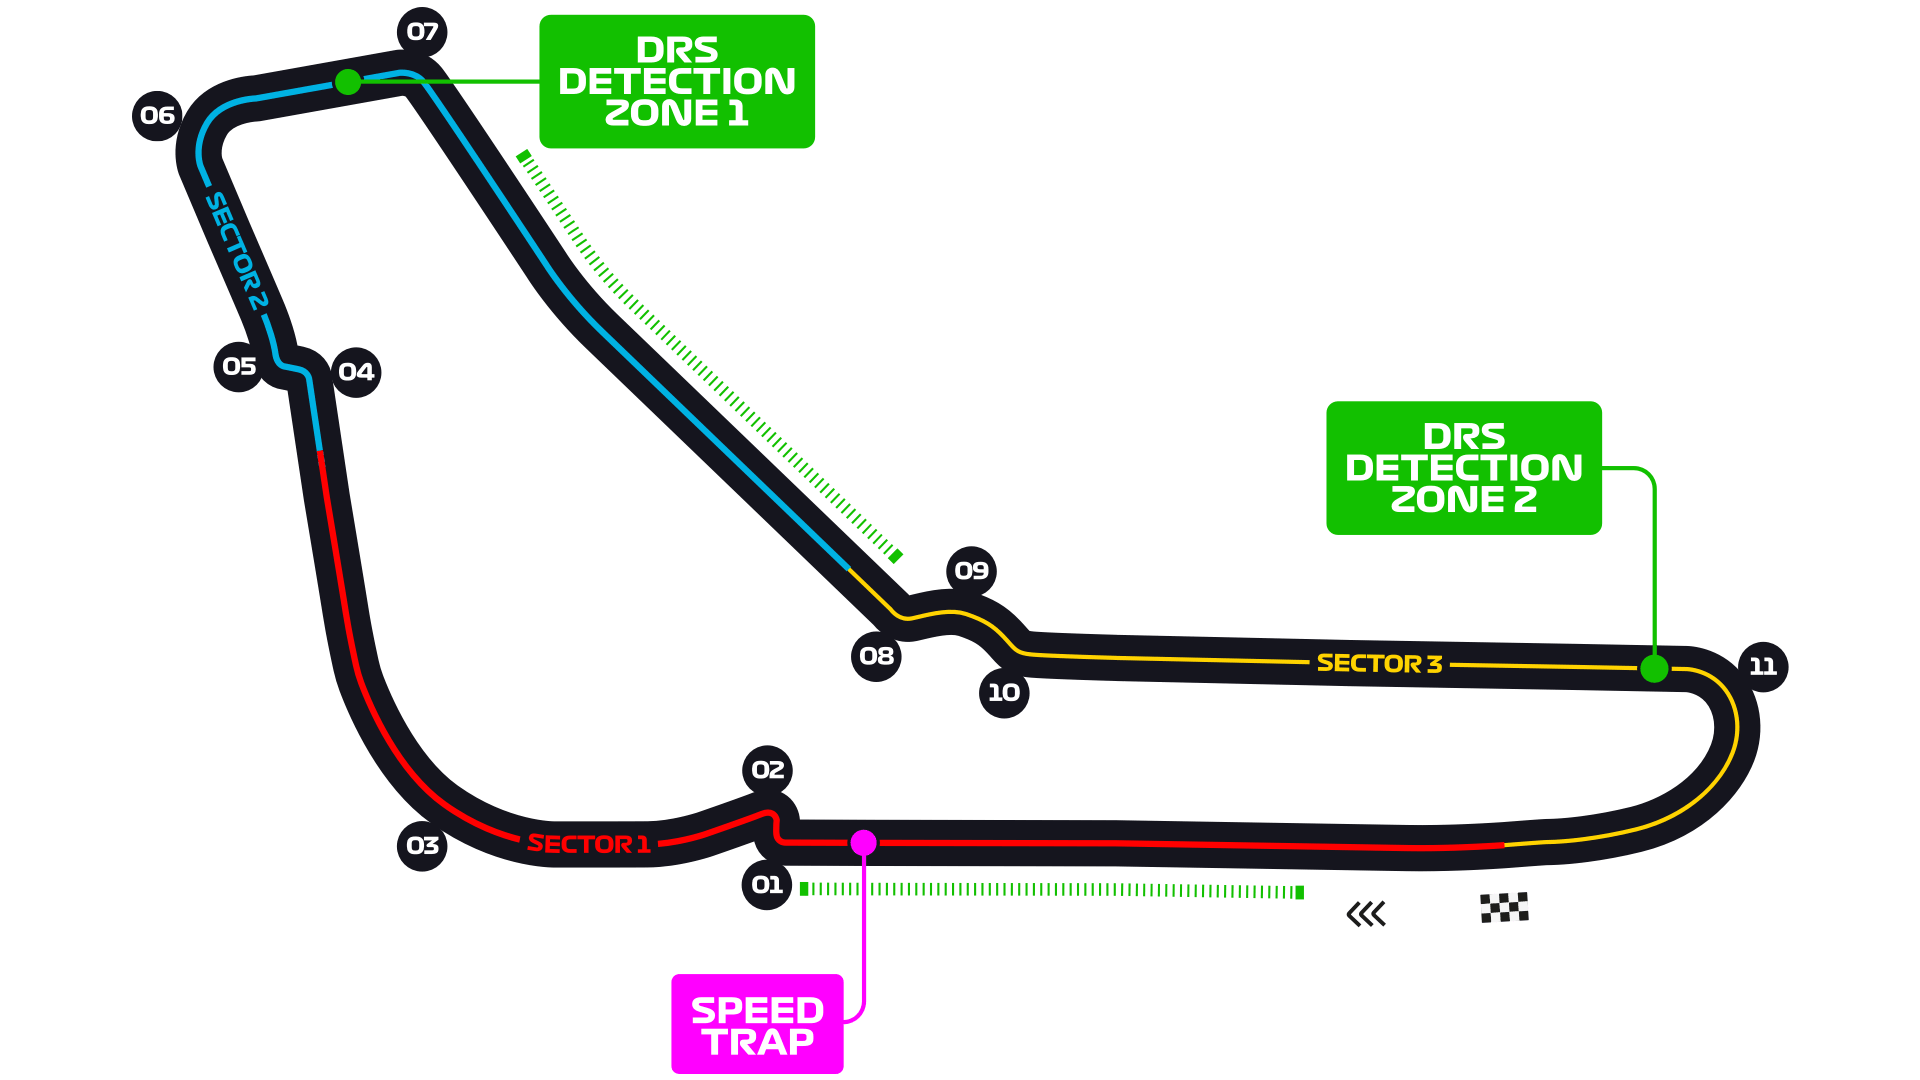

In [33]:
#Monza
monza = []
monza_results = []
monza_count = 0
Image('Italy_Circuit.png')

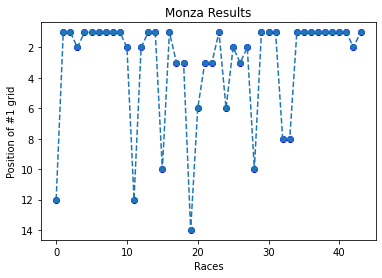

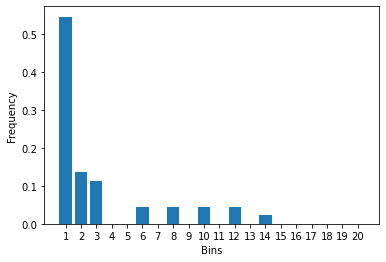

In [34]:
monzaDF = races.loc[races['circuitId'] == monzaid]['raceId']
for x in monzaDF:
    monza.append(x)
    test = results.loc[(results['grid'] == 1) & (results['raceId'] == x)]['position']
    for i in test:
        if i in list:
            monza_results.append(i)
        else:
            monza_count += 1
    
#Plot results
plot_circuit(monza_results, "Monza")
# Regression time

gaus = gaussian_fun(monza_results)
plot_pos(gaus)

Prediction made with Linear regression: 3
Prediction made with Decision Tree: 1


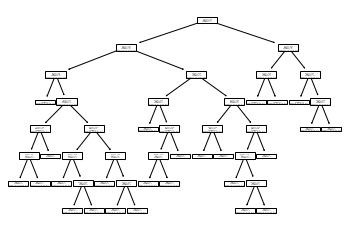

In [35]:
regression_fun(monza_results)
pred = regression_fun2(monza_results)

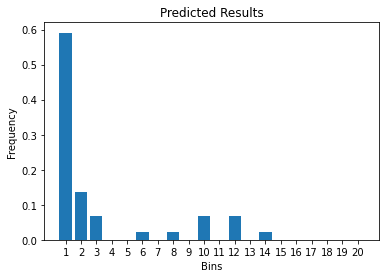

In [36]:
gaus = gaussian_fun(pred)
plt.title('Predicted Results')
plot_pos(gaus)

These 2 circuits, because the number of races is not enough to be able to make a good prediction, we dont work with them.

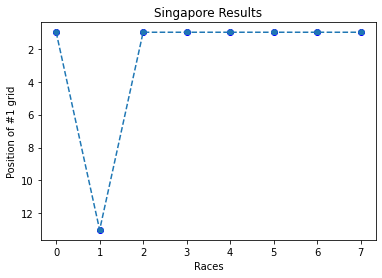

In [37]:
#Singapore
singapore = []
singapore_results = []
singapore_count = 0

singaporeDF = races.loc[races['circuitId'] == singaporeid]['raceId']
for x in singaporeDF:
    singapore.append(x)
    test = results.loc[(results['grid'] == 1) & (results['raceId'] == x)]['position']
    for i in test:
        if i in list:
            singapore_results.append(i)
        else:
            singapore_count += 1
    
#Plot results
plot_circuit(singapore_results, "Singapore")

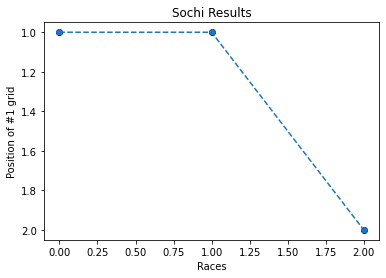

In [38]:
#Sochi
sochi = []
sochi_results = []
sochi_count = 0

sochiDF = races.loc[races['circuitId'] == sochiid]['raceId']
for x in sochiDF:
    sochi.append(x)
    test = results.loc[(results['grid'] == 1) & (results['raceId'] == x)]['position']
    for i in test:
        if i in list:
            sochi_results.append(i)
        else:
            sochi_count += 1
    
#Plot results
plot_circuit(sochi_results, "Sochi")

## Percentage of Not finishing the Race in each Circuit

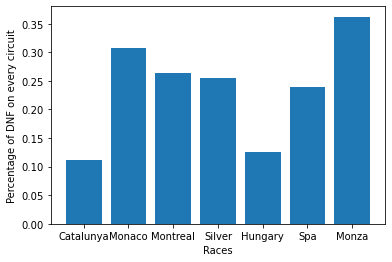

In [39]:
import matplotlib.ticker as mtick
circuits = ['Catalunya' , 'Monaco' , 'Montreal', 'Silver', 'Hungary','Spa','Monza']
values = [catalunya_count/(len(catalunya_results)+catalunya_count), monaco_count/(len(monaco_results)+monaco_count), montreal_count/(len(montreal_results)+montreal_count), silverstone_count/(len(silverstone_results)+silverstone_count), hungaroring_count/(len(hungaroring_results)+hungaroring_count), spa_count/(len(spa_results)+spa_count), monza_count/(len(monza_results)+monza_count)]
plt.bar(circuits,values)
plt.xlabel("Races")
plt.ylabel("Percentage of DNF on every circuit")
plt.show()

### Result: We confirm the hypotheses